**In this lab about linear regression, we'll be working with the library [StatsModel](https://www.statsmodels.org/stable/index.html), which provides numerous classes and functions for the estimation of statistical models.**

**The dataset that we'll be considering is 'diamond.csv' [[1]](https://www.kaggle.com/datasets/shivam2503/diamonds), which contains several information about diverse diamonds, such as their dimensions, the quality of their cuts, their prices, etc... The goal of the lab will be to define linear regression models to best estimate diamonds prices using a bunch of predictor variables, and to understand the meaning of the obtained coefficients.**

**Dataset's column information :**

*   'price' : price in US dollars.
*   'carat' : weight of the diamond. 
*   'cut' : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   'color' : diamond's color's, from J (worst) to D (best).
*  'clarity' : how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* 'x' : length in mm.
* 'y' : width in mm. 
* 'z' : height in mm.
* 'table' : width of top of the diamond relative to its widest point. 
* 'depth' = 2z/(x+y) 



**Import necessary libraries**

In [15]:
import statsmodels.api as sm
import numpy as np
import pandas as pd 
from patsy import dmatrices
import matplotlib.pyplot as plt 

**1) Load the dataset, take a look at its properties (shape, data type, etc...). Be careful to set the dataframe incides correctly. Check for missing values, and replace them appropriately if any are present.**

In [16]:
file = 'diamonds.csv'
df = pd.read_csv(file, index_col=0)
print(df.shape)
print(df.info())
print(df.head())
print(df.isna().sum())

(53940, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
None
   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5

**2) Generate scatter plots of the variable 'price' against the variables 'x', 'y' and 'z'. Do you notice anything strange ? How would you handle such cases ?** 

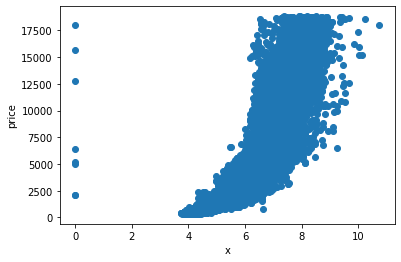

In [11]:
y = df.price.values 
X = df.x.values 


fig, ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('x')
ax.set_ylabel('price')
plt.show()

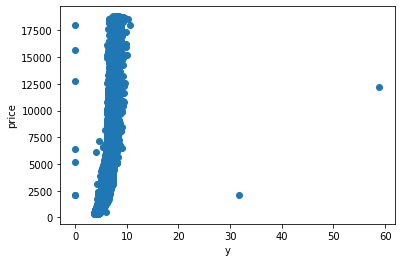

In [10]:
y = df.price.values 
X = df.y.values 

fig, ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('y')
ax.set_ylabel('price')
plt.show()

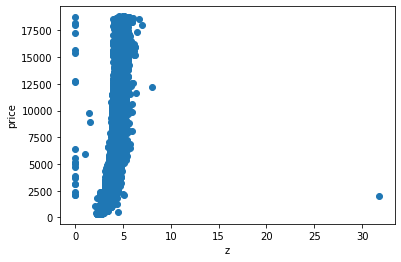

In [12]:
y = df.price.values 
X = df.z.values 

fig, ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('z')
ax.set_ylabel('price')
plt.show()

In [17]:
'''
The dimensional variables 'x', 'y' and 'z' take on the value 0, which is impossible.
Such outliers are likely to have resulted from an encoding error, and therefore, they
must be discarded. Also, some realizations take on very large values compared to the rest 
of the distribution. However, we cannot guarantee that these values resulted from a mistake
in measurement or encoding, and a such, we cannot delete them. 
'''

#Remove impossible outliers
cols = ['x', 'y', 'z']
for col in cols:
  df = df[df[col] != 0]

**3) Select 'price' a the target variable and 'x' as the predictor. Fit a linear regression model to the data, and output the model's summary.**

* **3.1) Is there evidence of a linear relationship between the target and the predictor variables ? What can you say regarding the statistical significance of the estimated coefficients ?**

* **3.2) How do you interpret the value of the coefficients ?**

* **3.3) What are the estimates' 95% confidence intervals, and how do you interpret them ?**

In [7]:
y, X = dmatrices('price ~ x', data=df, return_type='dataframe')

mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 1.994e+05
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:01   Log-Likelihood:            -4.8184e+05
No. Observations:               53920   AIC:                         9.637e+05
Df Residuals:                   53918   BIC:                         9.637e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.418e+04     41.327   -343.177      0.0

* 3.1) The F-statistic and the R2 values all take on large values, indicating evidence of a linear relationship between 'price' and 'x'. All coefficients are statistically significant at the 5% level.  

* 3.2) 
  * A unit increase of 'x' results in an increase of the average price of the diamonds by 3160.24$.
  * The intercept in this case does not mean anything by itself, as the variable 'x' cannot take on the value 0. Otherwise, it could have been interpreted as the mean price when the length of the diamonds is equal to 0.  

* 3.3) [-1.43e+04, -1.41e+0.4] and [3146.366,     3174.106]. This means that we know with 95% confidence that the true coefficient's estimates lie within these intervals. 

**4) Add 'y' as another predictor variable, fit the model and output its summary.**

* **4.1) Is there still evidence of a linear relationship between the target and predictor variables ?**

* **4.2) How do you interpret the coefficients ?**



In [8]:
y, X = dmatrices('price ~ x + y', data=df, return_type='dataframe')

mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 9.981e+04
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:06   Log-Likelihood:            -4.8182e+05
No. Observations:               53920   AIC:                         9.636e+05
Df Residuals:                   53917   BIC:                         9.637e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.419e+04     41.333   -343.338      0.0

* 4.1) Yes, but compared to the previous model only involving 'x' as a predictor variable, we cannot observe any major improvement, meaning that the introduction of the variable 'y' does not seem to add significant information. This is further corroborated by the value of the coefficient of 'y', which is one order of magnitude lower than the one of 'x', for equivalent scales (both variables measure a dimension in mm). 

* 4.2) 

  * While keeping 'x' fixed, a unit increase in the variable 'y' leads to an increase of the average diamonds' price by 203.77 $. 
  
  * While keeping 'y' fixed, a unit increase in the variable 'x' leads to an increase of the average diamonds' price by 2957.9 $. 
  * Here again, the intercept does not have interpretation. 

**5) Add an interaction term between 'x' and 'y', refit the model and output its summary.**

* **5.1) Does the model seems to be a better fit compared to the one with only 'x' and 'y' ?** 

* **5.2) How do you interpret the coefficients ?**

In [ ]:
y, X = dmatrices('price ~ x*y', data=df, return_type='dataframe')

mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 1.064e+05
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:21:41   Log-Likelihood:            -4.7141e+05
No. Observations:               53920   AIC:                         9.428e+05
Df Residuals:                   53916   BIC:                         9.429e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.193e+04    167.407     71.257      0.0

* 5.1) Yes, compared to the model without an interaction, the model's statistics improved significantly (R2, AIC, BIC), indicating a strong interaction between the variables 'x' and 'y'. All coefficients are statistically significant at the 5% significance level.  

* 5.2) Interpreting coefficients when an interaction term is present makes the job trickier. When 'y' is fixed, a unit increase in 'x' leads to a variation of the average diamonds' price by -500.38 + 763*y $, which is positive if y > 0.65. The opposite interpretation can be directly done for 'x'. 

**6) Generate dummy variables out of the variables 'cut', 'color' and 'clarity'. Make sure that for each of those variables, one level was selected as the reference level (and consequently, that this level is not represented by a dummy variable).**

**Why do we need to have k-1 dummy variables, when k is the number of levels ?**

In [18]:
cat_var = ['cut', 'color', 'clarity']
df_dummies = pd.get_dummies(df[cat_var], drop_first=True)
df_cont = df.drop(cat_var, axis=1)
df_cat = pd.concat([df_dummies, df_cont], axis=1)

df_cat.rename(mapper={'cut_Very Good':'cut_Very_Good'}, axis=1, inplace=True)

'''
If we create k dummy variables out of the k levels of a categorical variable, we make these variables collinear, meaning that 
they are highly correlated. Indeed, if I want to generate k dummy variables out of the variable 'cut', I can exactly know the value of one dummy 
by simply looking at the others. Let's imagine that the variable 'cut' can only take on three levels : Fair, Good, Very Good. If I generate three 
dummy variables out of these levels, 'd_Fair', 'd_Good', 'd_VeryGood', I can say which value takes 'd_Fair' by simply looking at the realizations of 'd_Good'
and 'd_VeryGood', meaning that these three variables are highly correlated. This is known as the 'dummy trap'. However, if I define only 'd_Fair' and 'd_Good' 
as dummy variables while keeping 'Very Good' as the reference level, my dummy variables are no longer correlated as it is impossible to know 
which value takes 'd_Fair' by only looking at 'd_VeryGood'. 

The problem is that introducing highly correlated variables in a linear model makes the variance of the coefficient estimates blow up, 
which is hardly a good thing. (you may try it yourself by removing 'drop_first=True' in the above cell and by fitting a linear model on the dummy's).
'''

"\nIf we create k dummy variables out of the k levels of a categorical variable, we make these variables collinear, meaning that \nthey are highly correlated. Indeed, if I want to generate k dummy variables out of the variable 'cut', I can exactly know the value of one dummy \nby simply looking at the others. Let's imagine that the variable 'cut' can only take on three levels : Fair, Good, Very Good. If I generate three \ndummy variables out of these levels, 'd_Fair', 'd_Good', 'd_VeryGood', I can say which value takes 'd_Fair' by simply looking at the realizations of 'd_Good'\nand 'd_VeryGood', meaning that these three variables are highly correlated. This is known as the 'dummy trap'. However, if I define only 'd_Fair' and 'd_Good' \nas dummy variables while keeping 'Very Good' as the reference level, my dummy variables are no longer correlated as it is impossible to know \nwhich value takes 'd_Fair' by only looking at 'd_VeryGood'. \n\nThe problem is that introducing highly correlat

**7) Refit the model using the dummy variables obtained from the variable 'color', and output its summary.**

* **7.1) Does the model seem to be a good fit ?**

* **7.2) Are all coefficients significant ? if not, what does it mean ?**

* **7.3) How do you interpret the coefficients ?**


In [19]:
y, X = dmatrices('price ~ color_E + color_F + color_G + color_H + color_I + color_J', data=df_cat, return_type='dataframe')

mod = sm.OLS(y, X)

res = mod.fit()
print(dir(res))
print(res.summary())
print(res.aic)

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlie

7.1) No, the very low R2 value compared to the previous models and the increase of the AIC and BIC tend to indicate that the variable 'color' is a poor predictor to explain the variable 'price'. Also, the F-statistic dropped. 

7.2) The coefficient of the dummy variable encoding the color E is not significant at the 5% significance level, meaning that, given the data, we do not have enough evidence that this coefficient is statistically different from 0. 

7.3) The average price for a diamond of color 'F' is 3168.1 + 556.97 = 3725.07 $, and the same reasoning can be applied to the other colors. In the case of dummy of dummy variables, the intercept has an important meaning, as it gives the average price of diamonds which have the reference level as color (in this case, the color 'D'). Thus, the average price of diamonds of color 'D' is 3168.1. 

**8) Refit the model using this time all predictor variables (at the exception of price, of course), and output its summary.**

**What do you observe ? Does the model seem to be a better fit compared to the previous ones ? Are all coefficients still significant ?**

In [20]:
formula = 'price ~ '
columns = list(df.columns)
columns.remove('price')
for col in columns : formula += col + '+'
formula = formula.rstrip('+')

y, X = dmatrices(formula, data=df, return_type='dataframe')

mod = sm.OLS(y, X)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.699e+04
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:47:13   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53896   BIC:                         9.111e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2711.9832    413.798  

8) The R2 coefficent increased compared to previous models to a value of 0.92, but we must be careful as this behaviour is expected (increasing the number of predictors tends to increase the value of R2, whether they are meaningful or not). However, the AIC and BIC values, which account for the number of predictors in the model, also decreased, which tend to suggest a better fit. 

However, the coefficent of 'y' is not significant anymore, which would suggest that it needs to be removed from the model. Also, when estimating the p-values, we are conducting many hypothesis tests in parallel, which considerably increases the risk of Type 1 errors, and this should be appropriately accounted for (e.g. using a Bonferroni correction). 

**9) We will now select candidate features to fit our model using a forward selection strategy. To this end, we will define different entering criteria for our candidate features :**
* Does the introduction of the feature decreases the MSE ? 
* Does the introduction of the feature decreases the AIC ? 
* Does the introduction of the feature decreases the BIC ? 
 
**To this end, define two new functions : neg_AIC(y_true, y_pred, n, k) and neg_BIC(y_true, y_pred, n, k) that respectively compute the negative AIC and BIC given the ground truth y values (y_true), the predicted y values (y_pred), the number of samples (n) and the number of predictors (k). The AIC and BIC can be computed as such :**

* AIC = 2*k + n*log(mse) 
* BIC = n*log(mse) + k*log(n)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score


def forward_selection(df, model, target_column, columns, scoring_rule):
  features_to_keep  = []
  features_to_try = []  
  best_score = -np.inf
  cond = True
  y = df[target_column].values
  while len(columns) != 0 and cond is True:
    cond = False
    best_feat = None 
    for col in columns:  
      features_to_try = features_to_keep + [col]   
      X = get_predictors(df, features_to_try)
      n, k = X.shape[0], X.shape[1]
      if scoring_rule == 'aic':
        scorer = make_scorer(neg_AIC, n=n, k=k, greater_is_better=True)
      elif scoring_rule == 'bic':
        scorer = make_scorer(neg_BIC, n=n, k=k, greater_is_better=True)
      else:
        scorer = scoring_rule
      cv_results = cross_validate(model, X, y, scoring=scorer, cv=10)
      score = cv_results['test_score'].mean()
      if score > best_score: 
        best_feat = col
        cond = True
        best_score = score
    if best_feat != None:
      columns.remove(best_feat)
      features_to_keep.append(best_feat)
  return features_to_keep, best_score 

def get_predictors(df, cols):
  cat_pred = []
  cont_pred = []
  for col in cols:
    if isinstance(df[col].values[0], str):
      cat_pred.append(col)
    else:
      cont_pred.append(col)
    if len(cat_pred) != 0:
      df_dummies = pd.get_dummies(df[cat_pred], drop_first=True)
    else:
      df_dummies  = pd.DataFrame() 
  df_cont = df[cont_pred] 
  df_cat = pd.concat([df_dummies, df_cont], axis=1)
  
  return df_cat.values  


def neg_AIC(y_true, y_pred, n, k):
  mse = mean_squared_error(y_true, y_pred)
  return -(2*k + n*np.log(mse))

def neg_BIC(y_true, y_pred, n, k):
  mse = mean_squared_error(y_true, y_pred)
  return -(n*np.log(mse) + k*np.log(n))


**10) Use the function forward_selection() and the functions neg_AIC() and neg_BIC() to perform a forward selection on the dataframe features (at the exception of carat) to see which subset of features is best to fit the target variable 'price'. Also, do a forward selection with an entering criterion defined as the MSE. When performing selection, do not consider the variable 'carat'.**

**For each selection, report the best subset of features obtained, as well as the score obtained. What do you observe ?**  

In [8]:
columns = list(df.columns)
for x in ['price', 'carat'] : columns.remove(x)
model = LinearRegression(fit_intercept=True)

features_MSE, score_MSE = forward_selection(df, model, 'price', columns.copy(), 'neg_mean_squared_error')

print('Features kept using MSE : {}'.format(features_MSE))
print('Score : {}'.format(-score_MSE))

model = LinearRegression(fit_intercept=True)
features_AIC, score_AIC = forward_selection(df, model, 'price', columns.copy(), 'aic')

print('Features kept using AIC : {}'.format(features_AIC))
print('Score : {}'.format(-score_AIC))


model = LinearRegression(fit_intercept=True)
features_BIC, score_BIC = forward_selection(df, model, 'price', columns.copy(), 'bic')

print('Features kept using BIC : {}'.format(features_BIC))
print('Score : {}'.format(-score_BIC))


Features kept using MSE : ['x', 'clarity', 'color', 'table', 'cut']
Score : 3690915.078216155
Features kept using AIC : ['y', 'clarity', 'color', 'table']
Score : 786903.289502688
Features kept using BIC : ['y', 'clarity', 'color', 'table']
Score : 787036.7239166384


10) The set of predictors obtained when defining the BIC or the AIC as the entering criterion is smaller than the one obtained with the MSE. This is expected, as the AIC and the BIC penalize the inclusion of a new predictor to the model, which is not the case of the MSE. As a general rule, using the BIC might result in a smaller set than when using the AIC, which might in turn results in a smaller set than when using the MSE. 

**11) Looking at the scatter plot of the variable 'price' against the variable 'x', a linear model might not be the best fit to explain the relation between the two variables.  Using a transformation of the variable 'x', try to obtain a better fit. Plot the linear regression line and the one obtained using the transformation of 'x'.**

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 2.586e+05
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:02:48   Log-Likelihood:            -4.7618e+05
No. Observations:               53920   AIC:                         9.524e+05
Df Residuals:                   53918   BIC:                         9.524e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5301.4666     19.507   -271.777      0.0

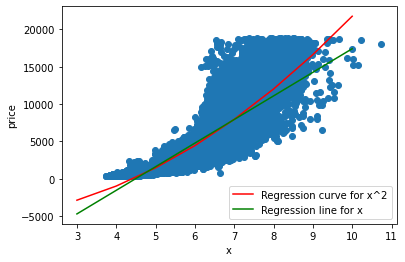

In [21]:
'''
The scatter plot suggests that an higher order polynomial might be better suited than a linear term. This confirm this, 
lets fit the model using the square of the variable 'x'. We observe that it endeed improves the results compared to 
fitting the model only using 'x'. 
'''

df['x2'] = df['x']**2

y, X = dmatrices('price ~ x2', data=df, return_type='dataframe')

mod = sm.OLS(y, X)

res = mod.fit()
print(res.summary())

p = res.params
fig, ax = plt.subplots()
ax.scatter(df['x'], df['price'])
xaxis = np.arange(3,11,1)
ax.plot(xaxis, p.Intercept + p.x2 * xaxis**2, color='red', label='Regression curve for x^2')

y, X = dmatrices('price ~ x', data=df, return_type='dataframe')

mod = sm.OLS(y, X)

res = mod.fit()
p = res.params
ax.plot(xaxis, p.Intercept + p.x * xaxis, color='green', label='Regression line for x')
ax.set_xlabel('x')
ax.set_ylabel('price')
ax.legend()